## Analyzing  WhiteHouse Visitor Records
AS part of our analysis we want to answer several questions;
  - Which day of week receives most vistors
  - Which month recieves most visitors

In [1]:
#import libraries

import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




records = pd.read_csv('C://Users//simon//Downloads//potus_visitors_2015.csv') # extract
records

,name,appt_made_date,appt_start_date,appt_end_date,visitee_namelast,visitee_namefirst,meeting_room,description
0,Joshua T. Blanton,2014-12-18T00:00:00,1/6/15 9:30,1/6/15 23:59,NaN,potus,west wing,JointService Military Honor Guard
1,Jack T. Gutting,2014-12-18T00:00:00,1/6/15 9:30,1/6/15 23:59,NaN,potus,west wing,JointService Military Honor Guard
2,Bradley T. Guiles,2014-12-18T00:00:00,1/6/15 9:30,1/6/15 23:59,NaN,potus,west wing,JointService Military Honor Guard
3,Loryn F. Grieb,2014-12-18T00:00:00,1/6/15 9:30,1/6/15 23:59,NaN,potus,west wing,JointService Military Honor Guard
4,Travis D. Gordon,2014-12-18T00:00:00,1/6/15 9:30,1/6/15 23:59,NaN,potus,west wing,JointService Military Honor Guard
...,...,...,...,...,...,...,...,...
47949,William B. Henline,2015-12-16T00:00:00,12/18/15 16:30,12/18/15 23:59,NaN,POTUS/FLOTUS,State Floo,NaN
47950,Ian T. Burris,2015-12-16T00:00:00,12/18/15 16:30,12/18/15 23:59,NaN,POTUS/FLOTUS,State Floo,NaN
47951,James F. Albaugh,2015-12-16T00:00:00,12/18/15 16:30,12/18/15 23:59,NaN,POTUS/FLOTUS,State Floo,NaN
47952,Jackie L. Finken,2015-12-16T00:00:00,12/18/15 16:30,12/18/15 23:59,NaN,POTUS/FLOTUS,State Floo,NaN


In [3]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47954 entries, 0 to 47953
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               47954 non-null  object
 1   appt_made_date     47954 non-null  object
 2   appt_start_date    47954 non-null  object
 3   appt_end_date      47954 non-null  object
 4   visitee_namelast   6069 non-null   object
 5   visitee_namefirst  47953 non-null  object
 6   meeting_room       47954 non-null  object
 7   description        8053 non-null   object
dtypes: object(8)
memory usage: 2.9+ MB


In [9]:
# clean columns
# drop column

records.drop(['visitee_namelast', 'appt_made_date'], axis =1, inplace=True)

In [10]:
# check for missing values

records.isna().sum()

name                     0
appt_start_date          0
appt_end_date            0
visitee_namefirst        1
meeting_room             0
description          39901
dtype: int64

In [11]:
records['appt_start_date'] = [dt.datetime.strptime(x,'%m/%d/%y  %H:%M') for x in records['appt_start_date']] #convert dtype

In [12]:
records['appt_end_date'] = [dt.datetime.strptime(x, '%m/%d/%y %H:%M') for x in records['appt_end_date']]

In [13]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47954 entries, 0 to 47953
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               47954 non-null  object        
 1   appt_start_date    47954 non-null  datetime64[ns]
 2   appt_end_date      47954 non-null  datetime64[ns]
 3   visitee_namefirst  47953 non-null  object        
 4   meeting_room       47954 non-null  object        
 5   description        8053 non-null   object        
dtypes: datetime64[ns](2), object(4)
memory usage: 2.2+ MB


In [14]:
records['time_diff'] = records['appt_end_date'] - records['appt_start_date'] #create timedelta col

In [15]:
records

,name,appt_start_date,appt_end_date,visitee_namefirst,meeting_room,description,time_diff
0,Joshua T. Blanton,2015-01-06 09:30:00,2015-01-06 23:59:00,potus,west wing,JointService Military Honor Guard,0 days 14:29:00
1,Jack T. Gutting,2015-01-06 09:30:00,2015-01-06 23:59:00,potus,west wing,JointService Military Honor Guard,0 days 14:29:00
2,Bradley T. Guiles,2015-01-06 09:30:00,2015-01-06 23:59:00,potus,west wing,JointService Military Honor Guard,0 days 14:29:00
3,Loryn F. Grieb,2015-01-06 09:30:00,2015-01-06 23:59:00,potus,west wing,JointService Military Honor Guard,0 days 14:29:00
4,Travis D. Gordon,2015-01-06 09:30:00,2015-01-06 23:59:00,potus,west wing,JointService Military Honor Guard,0 days 14:29:00
...,...,...,...,...,...,...,...
47949,William B. Henline,2015-12-18 16:30:00,2015-12-18 23:59:00,POTUS/FLOTUS,State Floo,NaN,0 days 07:29:00
47950,Ian T. Burris,2015-12-18 16:30:00,2015-12-18 23:59:00,POTUS/FLOTUS,State Floo,NaN,0 days 07:29:00
47951,James F. Albaugh,2015-12-18 16:30:00,2015-12-18 23:59:00,POTUS/FLOTUS,State Floo,NaN,0 days 07:29:00
47952,Jackie L. Finken,2015-12-18 16:30:00,2015-12-18 23:59:00,POTUS/FLOTUS,State Floo,NaN,0 days 07:29:00


In [16]:
records['time_diff']

0       0 days 14:29:00
1       0 days 14:29:00
2       0 days 14:29:00
3       0 days 14:29:00
4       0 days 14:29:00
              ...      
47949   0 days 07:29:00
47950   0 days 07:29:00
47951   0 days 07:29:00
47952   0 days 07:29:00
47953   0 days 07:29:00
Name: time_diff, Length: 47954, dtype: timedelta64[ns]

In [18]:
records['hours'] = records['time_diff'] / np.timedelta64(1,  'h') #get hours

In [19]:
records['hours']

0        14.483333
1        14.483333
2        14.483333
3        14.483333
4        14.483333
           ...    
47949     7.483333
47950     7.483333
47951     7.483333
47952     7.483333
47953     7.483333
Name: hours, Length: 47954, dtype: float64

In [20]:
records['time_diff'].dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,0,14,29,0,0,0,0
1,0,14,29,0,0,0,0
2,0,14,29,0,0,0,0
3,0,14,29,0,0,0,0
4,0,14,29,0,0,0,0
...,...,...,...,...,...,...,...
47949,0,7,29,0,0,0,0
47950,0,7,29,0,0,0,0
47951,0,7,29,0,0,0,0
47952,0,7,29,0,0,0,0


# Extracting month & day of week

In [20]:
records['appt_start_date'].dt.to_period('M') #to month

0        2015-01
1        2015-01
2        2015-01
3        2015-01
4        2015-01
          ...   
47949    2015-12
47950    2015-12
47951    2015-12
47952    2015-12
47953    2015-12
Name: appt_start_date, Length: 47954, dtype: period[M]

In [22]:
records['month'] = pd.to_datetime(records['appt_start_date']).dt.month  #new month col
records['year']  = pd.to_datetime(records['appt_start_date']).dt.year   # new year col

In [23]:
records.month.value_counts()

12    13029
6      7743
4      4996
9      4416
10     3669
5      3013
7      2930
3      2262
2      2165
8      1350
1      1248
11     1133
Name: month, dtype: int64

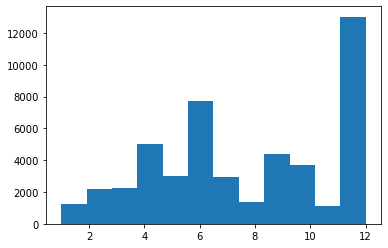

In [24]:
plt.hist(records.appt_start_date.dt.month,bins=12)
plt.show()

### December was the month with most visitors

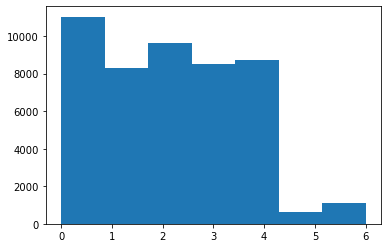

In [25]:
plt.hist(records.appt_start_date.dt.dayofweek,bins=7)
plt.show()

### Monday has most visitors while Weekends sat  & sun have the least visitors

###   Answer

#####  Which rooms tend to have long meetings